In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('phlogopite')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['yL_16_phlogopite[010]',
 'yL_16_phlogopite[110]',
 'yL_16_phlogopite[001]',
 'isotropic_model:yL_16_phlogopite[010]+yL_16_phlogopite[110]+yL_16_phlogopite[001]']

# Exploring Pyrrhenious's Phlogopite Models Database Correspondence

Here we look at Phlogopite models parameterization correspondence of:

 * Li Y. et al., 2016. Unusually high electrical conductivity of phlogopite: the possible role of fluorine and geophysical implications

## Li Y. et al., 2016

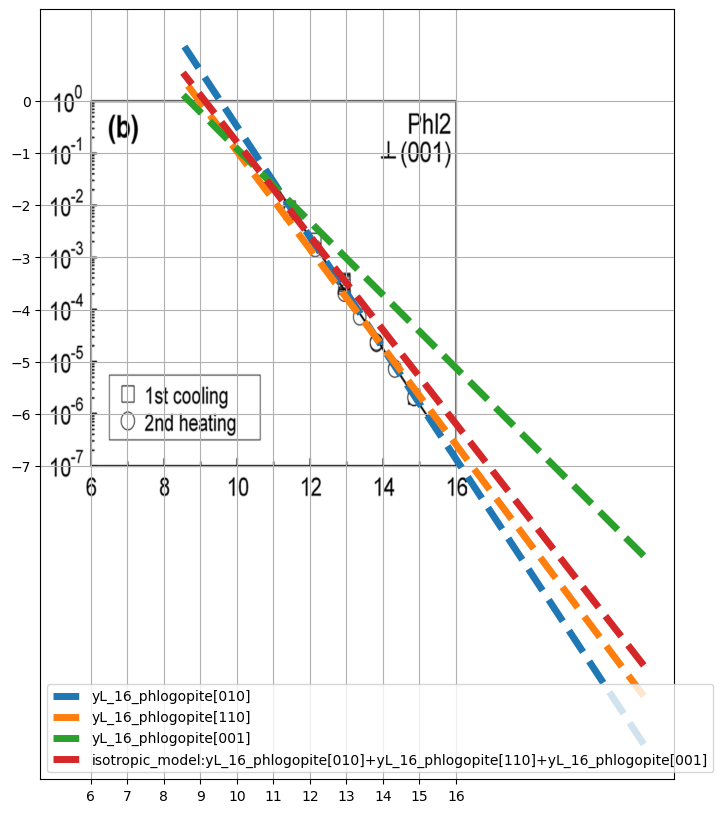

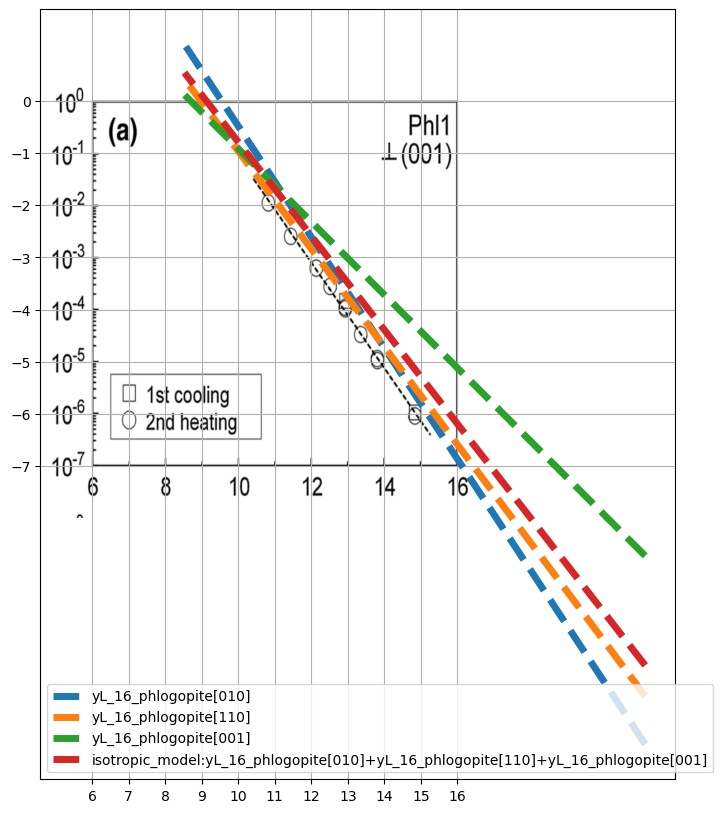

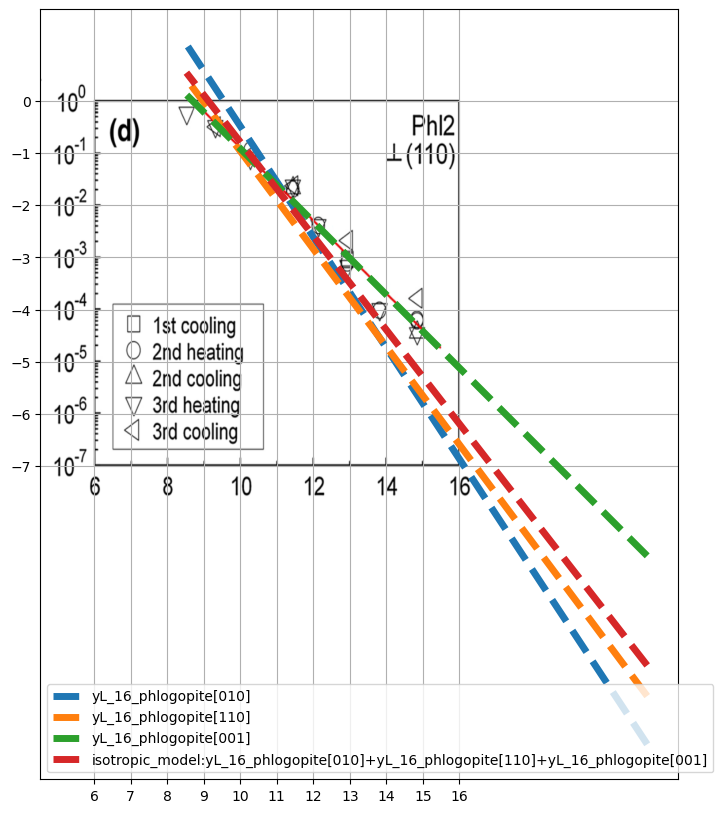

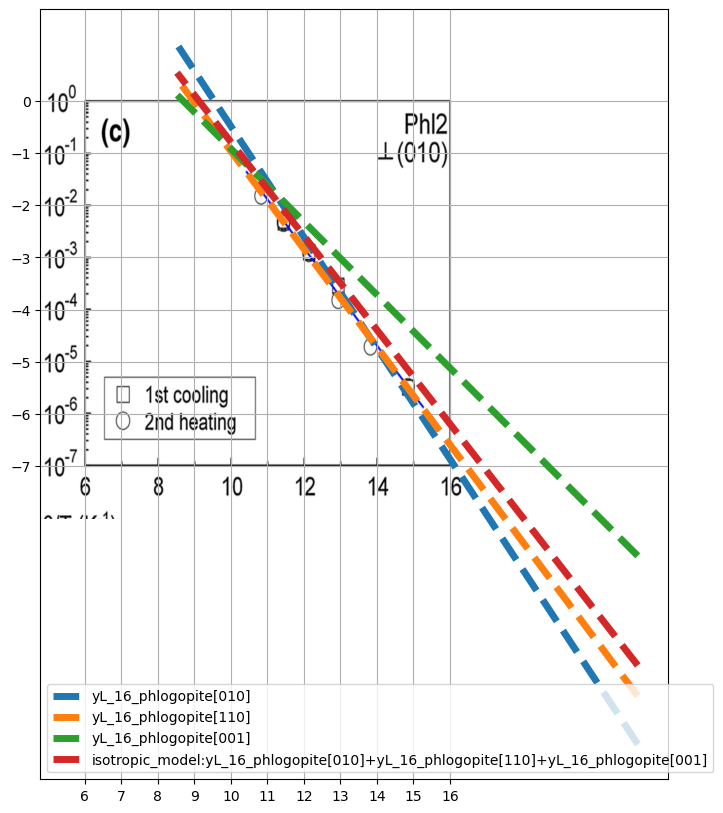

In [7]:
model = 'yL_16_phlogopite[010]'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in ecdatabase.get_model_list_for_phase('phlogopite'):
        conductivity = ecdatabase.get_model(model_name).get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5,label=model_name)
    plt.legend()
    


In [6]:
pngs

[]